In [111]:
import sqlite3
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

DB_PATH = "enron.db"

SAVE_DIR = "plots/"
SAVE_DIR_TBLS = 'tbls/'

experiment = True

conn = sqlite3.connect(DB_PATH)
c = conn.cursor()

# if experiment:
#     sql_query = "SELECT * FROM Message" 
# else:
#     sql_query = "SELECT * FROM v_DroppedFolders" 
if experiment:
    sql_query = "SELECT * FROM v_ExpMessages" 
else:
    sql_query = "SELECT * FROM v_CleanMessages" 

# 2. Use pd.read_sql_query to execute and fetch data
df = pd.read_sql_query(sql_query, conn)

conn.commit()
conn.close()

In [112]:
print()

In [113]:
large_words_df = df[df['length_word'] > 10_000].sort_values(by=['length_word'], ascending=False)
large_words_df

,mid,sender,eid,date,message_id,subject,body,folder,length_character,length_word
6839,44328,sarah.palmer@enron.com,44063,18/01/2002,<28543449.1075841171541.JavaMail.evans@thyme>,Enron Mentions -- 01/18/02,Enron Letter Writer Worked At Key Partnership ...,inbox,382300,60526
6809,44131,sarah.palmer@enron.com,44063,22/01/2002,<3540098.1075841167699.JavaMail.evans@thyme>,Enron Mentions (major papers only) -- 01/22/02...,Staff Saw Document Shredding at Enron --- Thre...,inbox,296101,47493
6808,44177,sarah.palmer@enron.com,44063,16/01/2002,<8593617.1075841176356.JavaMail.evans@thyme>,Enron Mentions (Part I) -- 01/16/02,Publicized Letter to Lay Involved Struggle Ove...,inbox,275335,44088
6824,44500,karen.denne@enron.com,44063,11/01/2002,<18448215.1075841182041.JavaMail.evans@thyme>,Enron Mentions - 1/11,News; Domestic\nInterview with General Tommy F...,inbox,280338,43087
6842,44245,sarah.palmer@enron.com,44063,22/01/2002,<20129879.1075841164549.JavaMail.evans@thyme>,Enron Mentions -- 01/22/02-01/21/02,Enron Attorney Says FBI Is Probing Shredding a...,inbox,245570,39163
6811,44116,sarah.palmer@enron.com,44063,04/02/2002,<15600486.1075841151666.JavaMail.evans@thyme>,Enron Mentions (major papers only) -- 02/04/2002,ENRON'S MANY STRANDS\nThe Report\nThe New York...,inbox,212063,33592
6847,44439,sarah.palmer@enron.com,44063,01/02/2002,<6336501.1075841154311.JavaMail.evans@thyme>,Enron Mentions -- 02/01/02,Joint Venture: A 1997 Enron Meeting Belies Off...,inbox,189151,30232
6810,44306,sarah.palmer@enron.com,44063,23/01/2002,<19071614.1075841162137.JavaMail.evans@thyme>,Enron Mentions (major papers only) -- 01/23/02...,Lawyers agree on order to safeguard documents\...,inbox,174126,27916
2486,11036,karen.denne@enron.com,10807,23/11/2001,<14699860.1075861375899.JavaMail.evans@thyme>,Articles,A full list of articles will be sent on Monday...,inbox,169748,26478
6813,44163,sarah.palmer@enron.com,44063,06/02/2002,<2943840.1075841146795.JavaMail.evans@thyme>,Enron Mentions (major papers only) -- 02/06/02,Questioning the Books: Enron Official Failed t...,inbox,161899,25769


In [114]:
from pprint import pprint
pprint(large_words_df['body'].iloc[0])

('Enron Letter Writer Worked At Key Partnership Early On\n'
 'Dow Jones Energy Service, 01/18/2002\n'
 '\n'
 "Enron's Chief Sold Shares After Receiving Warning Letter\n"
 'The New York Times, 01/18/2002\n'
 '\n'
 "A look at Thursday's developments involving Enron\n"
 'Associated Press Newswires, 01/18/2002\n'
 '\n'
 'Enron fires Andersen \n'
 'Board takes action as new facts surface \n'
 'Houston Chronicle, 01/18/2002\n'
 'In Enron Leaders, Seeing the Worst Of Ourselves\n'
 'The Washington Post, 01/18/2002\n'
 '\n'
 "Broadband-unit hype didn't match reality \n"
 'Houston Chronicle, 01/18/2002\n'
 '\n'
 'Enron chairman selling 2 homes, lot in Colorado for $16.2 million \n'
 'Houston Chronicle, 01/18/2002\n'
 '\n'
 'Blockbuster deal helped sow seeds of Enron fiasco CIBC World Markets agreed '
 'to invest $115.2-million in affiliated partnership\n'
 'Wall Street Journal,  01/18/2002\n'
 '\n'
 "Deals That Helped Doom Enron Began to Form in the Early 90's\n"
 'The New York Times, 01/18/2002

# KDE word character Plot

In [115]:
words_counts = df['length_word'].to_numpy()
character_counts = df['length_character'].to_numpy()


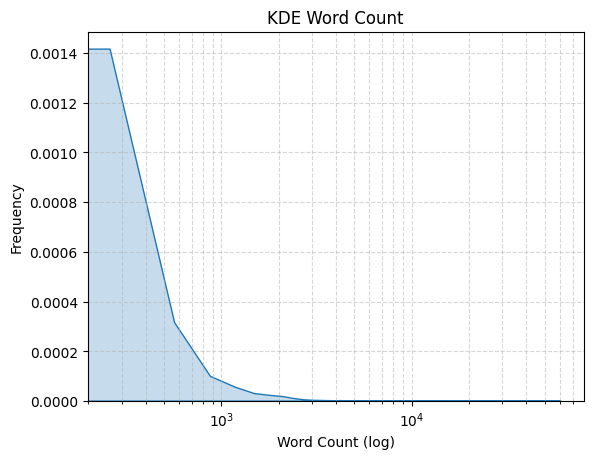

In [116]:

sns.kdeplot(words_counts, fill=True)
plt.title('KDE Word Count')
plt.xscale('log')
plt.xlabel('Word Count (log)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.savefig(SAVE_DIR + 'word_count_kde.png')
plt.show()
plt.close()

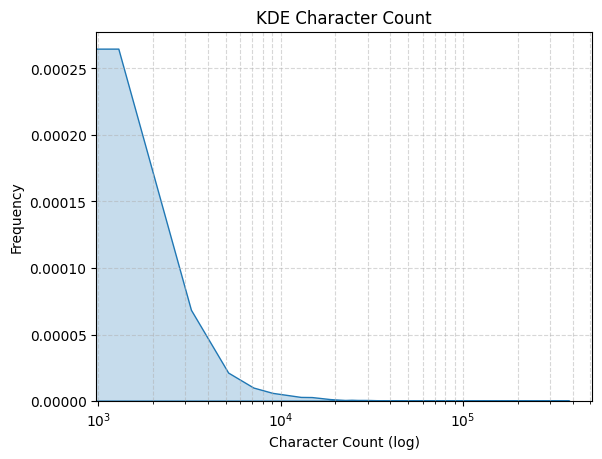

In [117]:

sns.kdeplot(character_counts, fill=True)
plt.title('KDE Character Count')
plt.xscale('log')
plt.xlabel('Character Count (log)')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.savefig(SAVE_DIR + 'character_count_kde.png')
plt.show()
plt.close()

# Box word character plot

In [ ]:
def export_stats_to_latex(name: str, data: np.array):
    """Calculates statistics and saves them as LaTeX macros in a .tex file."""
    
    # 1. Calculate Statistics
    q1 = np.percentile(data, 25)
    median = np.median(data)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    min_val = np.min(data)
    max_val = np.max(data)
    mean_val = np.mean(data)
    std_val = np.std(data)
    count_val = len(data)

    # 2. Define file path
    filepath = os.path.join(SAVE_DIR_TBLS, f"{name}_stats.tex")

    # 3. Write LaTeX commands to the file
    # We use :.0f for integers (like min/max) and :.2f for floats (like mean)
    # The 'r' before the string (rf"...") handles backslashes
    try:
        with open(filepath, 'w') as f:
            print(f"Writing stats for '{name}' to {filepath}...")
            # Using \newcommand instead of \def is safer as it checks for existence
            # We add a comma to the formatted integer values

            f.write(rf"\newcommand{{\{name}Length}}{{{len(data):,.0f}}}" + "\n")
            f.write(rf"\newcommand{{\{name}Min}}{{{min_val:,.0f}}}" + "\n")
            f.write(rf"\newcommand{{\{name}Qone}}{{{q1:,.0f}}}" + "\n")
            f.write(rf"\newcommand{{\{name}Median}}{{{median:,.0f}}}" + "\n")
            f.write(rf"\newcommand{{\{name}Qthree}}{{{q3:,.0f}}}" + "\n")
            f.write(rf"\newcommand{{\{name}Max}}{{{max_val:,.0f}}}" + "\n")
            f.write(rf"\newcommand{{\{name}Iqr}}{{{iqr:,.0f}}}" + "\n")
            f.write(rf"\newcommand{{\{name}Count}}{{{count_val:,.0f}}}" + "\n")
            f.write(rf"\newcommand{{\{name}Mean}}{{{mean_val:,.2f}}}" + "\n")
            f.write(rf"\newcommand{{\{name}Std}}{{{std_val:,.2f}}}" + "\n")
        print(f"Successfully wrote {filepath}")
        
    except IOError as e:
        print(f"Error writing to file {filepath}: {e}")

Writing stats for 'character' to tbls/character_stats.tex...
Successfully wrote tbls/character_stats.tex

--- Statistics for 'character' ---
  Median: 894
  Q1 (25%): 388
  Q3 (75%): 2,003
  IQR: 1,615
  Min: 47
  Max: 382,300
-----------------------------


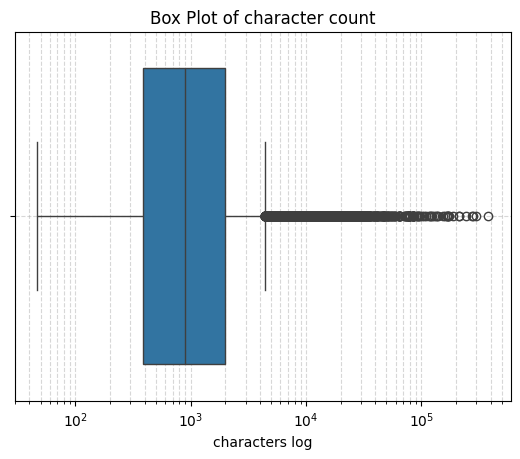

Writing stats for 'word' to tbls/word_stats.tex...
Successfully wrote tbls/word_stats.tex

--- Statistics for 'word' ---
  Median: 137
  Q1 (25%): 59
  Q3 (75%): 294
  IQR: 235
  Min: 11
  Max: 60,526
------------------------


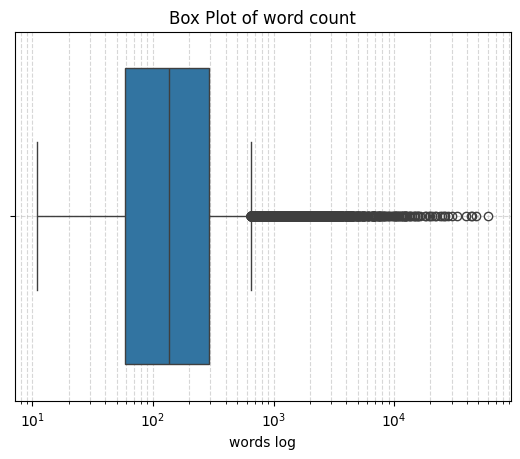

In [119]:
def boxplot(name: str, data: np.array):
    export_stats_to_latex(name, data)

    # --- 1. Calculate Statistics ---
    q1 = np.percentile(data, 25)
    median = np.median(data)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    min_val = np.min(data)
    max_val = np.max(data)

    # --- 2. Print Statistics to Console ---
    print(f"\n--- Statistics for '{name}' ---")
    print(f"  Median: {median:,.0f}")
    print(f"  Q1 (25%): {q1:,.0f}")
    print(f"  Q3 (75%): {q3:,.0f}")
    print(f"  IQR: {iqr:,.0f}")
    print(f"  Min: {min_val:,.0f}")
    print(f"  Max: {max_val:,.0f}")
    print("-" * (20 + len(name)))

    sns.boxplot(x=data)
    plt.title(f'Box Plot of {name} count')
    plt.xscale('log')
    plt.xlabel(f'{name}s log')
    plt.grid(True, which="both", ls="--", alpha=0.5)
    plt.savefig(f'{SAVE_DIR}{name}_counts_boxplot.png')
    plt.show()
    plt.close()


boxplot('character', character_counts)

boxplot('word', words_counts)



# Calc and plot semantic similarity subject body

# Barplot size of folder names (autogenerated sperate from rest and maybe top 10)

In [120]:
folder_size_df = df[['folder', 'length_word']]
folder_size_df.sort_values(by="length_word", ascending=False, inplace=True)

/tmp/ipykernel_56588/4262592797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  folder_size_df.sort_values(by="length_word", ascending=False, inplace=True)


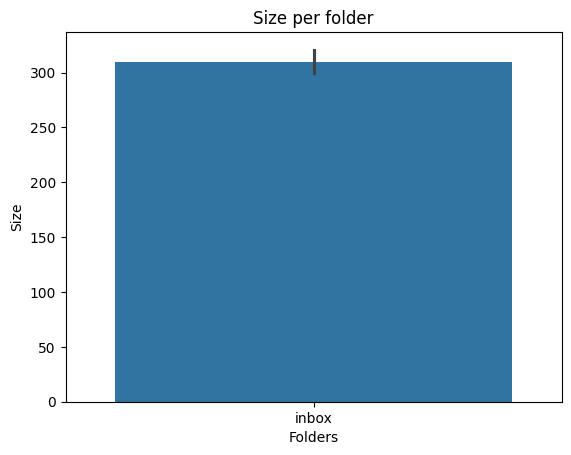

In [121]:
def barplot(data: np.array, names: np.array):
    plt.figure()
    sns.barplot(x=names, y=data) 

    plt.title('Size per folder')
    plt.xlabel('Folders')
    plt.ylabel('Size')
    plt.savefig(f'{SAVE_DIR}folder_size_barplot.png')
    plt.show()
    plt.close()

barplot(folder_size_df['length_word'].to_numpy(), folder_size_df['folder'].to_numpy())

TODO: One big overview without names (hist maybe)
TODO: Make a zoomed in version on the autogenerated ones and the biggest ones

# Distribution user mailbox size

# Topic analysis on the folder names (weighted on size)